# <center>복합재료 응력 분석을 위한 Deep learning 활용</center>
<br>

<center><em> 한국과학기술원 유승화 교수님 MMMM연구실<em>  </center>
<center><em> 박사과정 박동근 </center>
    


## 1.introdcution

### 1.1 문제 정의
 * __복합재료 응력 분석의 중요성__ : 재료 내 응력 집중 현상은 균열 전파로 이어지므로 이러한 현상을 미리 예측하는 것이 상당히 중요함.
![example 2](https://github.com/DonggeunPark/DG/assets/131414228/bf5e1a1b-3f91-422c-9c7f-69370f849fba)
<br>
 * __복합재료 응력 분석을 위한 기존 접근 방법__ : 유한요소해석 방법론을 통해 관심있는 재료 형상으로 부터 수치적으로 변형 및 응력 상태에 대해 시뮬레이션 접근 가능함.
![example 3](https://github.com/DonggeunPark/DG/assets/131414228/b5643c8b-b708-4dea-9770-9c8a933c9556)
<br>
 * __시뮬레이션 방법론의 한계__ : 새로운 입력 (형상, 경계조건)에 따라 관심있는 flux를 계산하는 것은 __큰 시간-비용 문제__ 가 발생함.
    

### 1.2 딥러닝 (Deep learning) 방법론
 * 딥러닝 방법론은 인공신경망과 기계학습을 결합하여 __복잡한 패턴을 학습하는 기법__.
 * __대량의 데이터__ 를 사용하고 다층 구조를 가진 신경망을 구성하여 특징을 추출하고 예측을 수행함.
 * 즉, __관심있는 입력 (x)__ 과 __알고자하는 출력 (y)간 관계__ 를 신경망을 통해 학습하여 __새로운 x__ 에 대해 예측하는 방법론.
    

## 2 딥러닝 방법론 절차에 따른 line-by-line code!

![example 5](https://github.com/DonggeunPark/DG/assets/131414228/112a0c45-1b42-42e8-b0ed-0b5b3a2ded44)
###  Two-phase composite 내 응력 분석 예제

![f](https://github.com/DonggeunPark/DG/assets/131414228/0ce5ab6e-81ea-4704-b8f3-2ca75db197f0)

### Step 1 "데이터 전처리 및 분석"

* 딥러닝을 활용한 문제 해결의 첫 번째는 **"데이터 분석"** 이다.
풀고자하는 문제가 명시되면 첫 번째로 데이터를 생성하고 이를 파이썬 플랫폼에 이식을 해준 뒤,
어떠한 형태를 갖고 있는지, **데이터가 오류가 없는지 분석과정**이 필요하다 :)

* 코드를 한줄씩 디버깅하며 **어떤 의미**인지 확인하고 #주석을 통해 간단한 설명을 참조하면 좋을 듯 하다.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# %cd /..
# %cd /content/drive/MyDrive/hanon_1st

In [1]:
import numpy as np
import seaborn as sns

# numpy, seaborn은 라이브러리로써 코드 활용을 위한 도구라고 생각하면 편하다!
x  = np.load('64_64_20_120_x_data.npy') # x에 FEM 시뮬레이션에 의해 생성된 복합재 데이터를 이식하는 작업.
y = np.load('64_64_20_120_strain.npy')

In [2]:
np.shape(x) # 이식된 x가 어떤 차원을 갖는지 분석이 필요하다.
# 1500개의 데이터 개수를 갖고 64X64크기 행렬을 갖는 것을 의미함.
np.shape(x)
print('x의 데이터 형태:'+str(np.shape(x)))
print('y의 데이터 형태:'+str(np.shape(y)))

x의 데이터 형태:(1500, 64, 64)
y의 데이터 형태:(1500, 64, 64)


* FEM 데이터가 파이썬 플랫폼에 잘 이식되었는지 확인된 후, 시각적 분석은 필수적이다!
* 시각화 방법은 강의 외 범위로 다양한 서적 및 Youtube를 통해 참조하려한다.
* 본 강의에서는 복합재료 및 응력분포를 시각화하는데 필요한 코드만 작성하였다.

[]

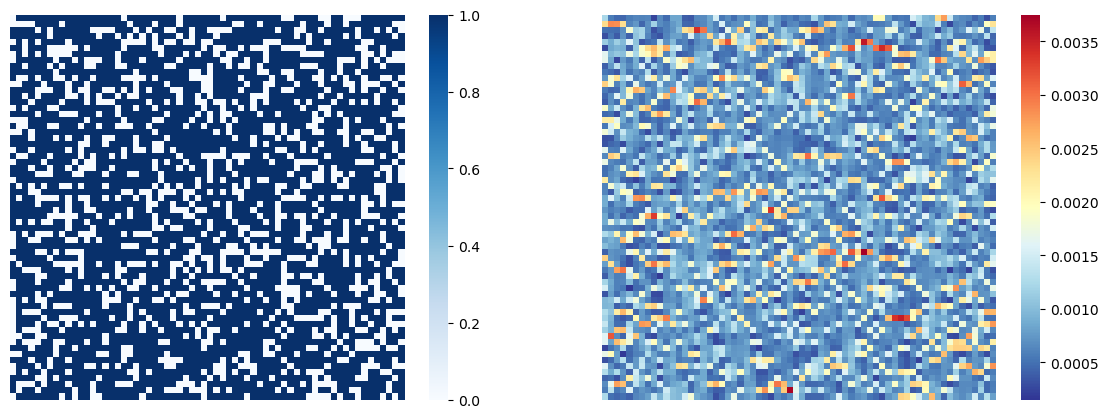

In [3]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2, figsize = (7*2,5))
sns.heatmap(x[1], cmap = 'Blues', ax = ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])

sns.heatmap(y[1], cmap = 'RdYlBu_r', ax = ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])

## Step 2 "딥러닝 구조 설계"
 * U-Net은 의료 이미지 분할 등에 널리 사용되는 딥러닝 알고리즘으로, 이미지의 컨텍스트 정보를 효과적으로 보존하면서 정확한 분할 결과를 제공함.
 * U-Net은 인코더와 디코더로 구성되며, 인코더는 이미지의 고수준 특징을 추출하고 디코더는 추출한 정보를 이용하여 입력 이미지의 크기에 맞는 출력 맵을 생성.
 * 학습된 U-Net은 새로운 이미지에 대한 출력을 수행할 수 있습니다.
 * 기존 U-Net과 달리 복합재 형상 (Configuration)으로부터 상응하는 continuous한 값을 갖는 응력 분포 (Stress fields)를 예측하기 위해 마지막 feature map을 변형함.
![example 1](https://github.com/DonggeunPark/DG/assets/131414228/f7a57a3a-22c3-43a9-9f49-2b084a04bc7b)


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras import optimizers
import keras

def UNet(input_shape=(64, 64, 1)):
    inputs = Input(input_shape)

    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(64, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(64, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bridge
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(pool3)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder
    up7 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(drop5))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(merge7)
    conv7 = Conv2D(64, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(merge8)
    conv8 = Conv2D(64, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same')(UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    # Output
    outputs = Conv2D(1, 1, activation='relu')(conv9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Step 3 학습 및 예측을 위한 데이터 셋 분할

 * 원하는 길이 혹은 분율을 설정하여 데이터 세트를 학습 및 시험 세트로 구성함.
 * 학습 세트와 시험 세트는 서로 전혀 다른 데이터 세트로, 새로운 조합에 대해 일반화 능력을 가져야함

In [5]:
x = np.expand_dims(x, axis=-1)
y = np.expand_dims(y, axis=-1)

x_train = x[0:1000]
y_train = y[0:1000]

x_val = x[1000:]
y_val = y[1000:]


In [6]:
print(np.shape(x))

(1500, 64, 64, 1)


In [7]:
input_img = keras.layers.Input((x.shape[1], x.shape[2], 1))
model = UNet()
adam = optimizers.Adam(learning_rate=1e-03, beta_1=0.9, beta_2=0.9, epsilon=None, amsgrad=False)
#adam = optimizers.Adam(learning_rate=1e-03, beta_1=0.9, beta_2=0.9, epsilon=None, decay=1E-6 , amsgrad=False)
model.compile(optimizer = 'adam', loss='mse', metrics=['mae'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           640       ['input_2[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 64)           36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [8]:
results = model.fit(x_train, y_train*10000,  validation_data=(x_val, y_val*10000), batch_size = 100, epochs = 30)

Epoch 1/30
10/10 [==============================] - 62s 6s/step - loss: 167.8557 - mae: 9.7165 - val_loss: 110.9296 - val_mae: 9.3524
Epoch 2/30
10/10 [==============================] - 62s 6s/step - loss: 111.6657 - mae: 8.5959 - val_loss: 74.9774 - val_mae: 7.2045
Epoch 3/30
10/10 [==============================] - 61s 6s/step - loss: 52.8738 - mae: 5.5891 - val_loss: 42.3895 - val_mae: 5.5933
Epoch 4/30
10/10 [==============================] - 61s 6s/step - loss: 42.9765 - mae: 5.3944 - val_loss: 32.6796 - val_mae: 5.0082
Epoch 5/30
10/10 [==============================] - 61s 6s/step - loss: 40.8652 - mae: 5.2744 - val_loss: 27.8463 - val_mae: 4.6096
Epoch 6/30
10/10 [==============================] - 60s 6s/step - loss: 39.2274 - mae: 5.1917 - val_loss: 25.2648 - val_mae: 4.2079
Epoch 7/30
10/10 [==============================] - 61s 6s/step - loss: 37.6560 - mae: 5.0376 - val_loss: 23.2743 - val_mae: 4.1298
Epoch 8/30
10/10 [==============================] - 61s 6s/step - loss: 3

# Step 4 학습된 모델 저장 및 학습 과정 시각화
 * 학습된 딥러닝 모델을 재사용하기 위해 학습된 parameter들을 저장하고, 앞서 설명한 학습 및 시험 데이터 세트에 대해 오버피팅 여부를 확인 필요

In [9]:
from keras.models import model_from_json, load_model

model_json = model.to_json()

with open("UNet.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("UNet.h5")
print("Saved model to disk")

Saved model to disk


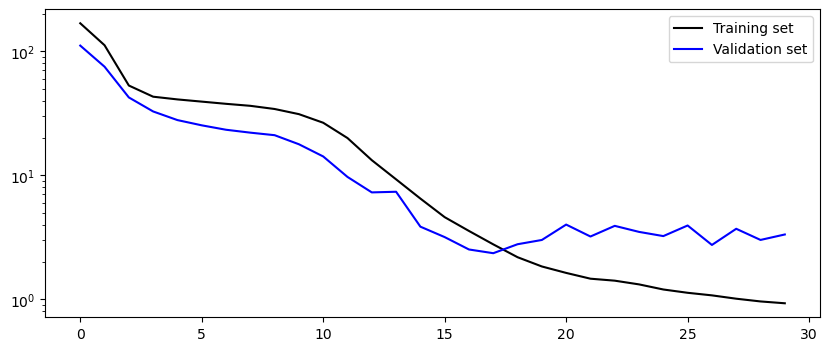

In [10]:
plt.figure(figsize = (10,4))
plt.plot(results.history['loss'],color = 'k', label = 'Training set')
plt.plot(results.history['val_loss'], color = 'b', label = 'Validation set')
plt.yscale('log')
plt.legend()

# Step 5 모델 호출 및 성능 테스트

In [11]:
from keras.models import model_from_json, load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate
from tensorflow.keras import optimizers
import keras
import tensorflow as tf
json_file = open("UNet.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)
loaded_model.load_weights("UNet.h5")

y_pre = loaded_model.predict(x_val)
y_pre = y_pre.reshape(x_val.shape[0],64,64)
y_pre = y_pre/10000

16/16 [==============================] - 5s 321ms/step


In [ ]:
import matplotlib.pyplot as plt
inputs = int(input('What is data sample?'))
fig,ax = plt.subplots(1,4, figsize = (7*4,5))
sns.heatmap(x_val[inputs], cmap = 'Blues', ax = ax[0])
ax[0].set_xticks([])
ax[0].set_yticks([])

sns.heatmap(y_val[inputs], cmap = 'RdYlBu_r', ax = ax[1])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title('FEM')

sns.heatmap(y_pre[inputs], cmap = 'RdYlBu_r', ax = ax[2])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title('Deep learning')

ax[3].plot(y_pre[0].reshape(64*64),y_val[0].reshape(64*64), linewidth = 0.05)